### Table of Contents of the notebook:

1. <a href="#1">**Libraries**</a>
2. <a href="#2">**Build fire module**</a>
3. <a href="#3">**Squeez**</a>
4. <a href="#4">**Mount Drive**</a>
5. <a href='#5'>**Load Data**</a>
6. <a href='#6'>**Display some images**</a>
7. <a href="#7">**Preprocessing**</a>
8. <a href="#8">**Compile and Train model**</a>
9. <a href="#9">**Display accuracy and loss curves**</a>

# 1. <a name="1">**Libraries**</a>

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import concatenate

from google.colab import drive
import os

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.utils import to_categorical

from keras.metrics import binary_crossentropy

from keras.optimizers import SGD, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

# 2. <a name="2">**Build fire module**</a>

In [ ]:
def fire_module(input_layer, f1, f2):
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the path
  # - f2 is number of filters corresponding to the 1x1 and 3x3 convolutional layers in the path
  
  # path:
  path = Conv2D(filters=f1, kernel_size = (1,1), activation = 'relu')(input_layer)

  # 1st path:
  path1 = Conv2D(filters=f2, kernel_size = (1,1), activation = 'relu')(path)

  # 2nd path:
  path2 = Conv2D(filters=f2, kernel_size = (3,3), padding = 'same', activation = 'relu')(path)

  # Out:
  Output = concatenate([path1, path2], axis = -1)

  return Output

# 3. <a name="3">**Squeez**</a>

In [ ]:
def Squeez():
  # Input layer:
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 96, kernel_size = (7,7)
  X = Conv2D(filters = 96, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 1st fire module
  X = fire_module(X, f1 = 16, f2 = 64)

  # 2nd fire module
  X = fire_module(X, f1 = 16, f2 = 64)

  # 3th fire module
  X = fire_module(X, f1 = 32, f2 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 4th fire module
  X = fire_module(X, f1 = 32, f2 = 128)

  # 5th fire module
  X = fire_module(X, f1 = 48, f2 = 192)

  # 6th fire module
  X = fire_module(X, f1 = 48, f2 = 192)

  # 7th fire module
  X = fire_module(X, f1 = 64, f2 = 256)  

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)  

  # 8th fire module
  X = fire_module(X, f1 = 64, f2 = 256) 

  # convolutional layer: filters = 2, kernel_size = (1,1)
  X = Conv2D(filters = 2, kernel_size = (1,1), strides = 1, padding = 'valid', activation = 'relu')(X)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # output layer 
  X = Dense(1, activation = 'sigmoid')(X)

  # model
  model = Model(input_layer, [X], name = 'SqueezNet')

  return model

In [ ]:
model = Squeez()

In [ ]:
model.summary()

Model: "SqueezNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_104 (Conv2D)            (None, 109, 109, 96  14208       ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 54, 54, 96)  0           ['conv2d_104[0][0]']             
 )                                                                                        

# 4. <a name="4">**Mount Drive**</a>

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# 5. <a name="5">**Load Data**</a>

In [ ]:
!gdown 1RxLFWqZRLbt3XYFjGve8zr-f0TYYE0iH

Downloading...
From: https://drive.google.com/uc?id=1RxLFWqZRLbt3XYFjGve8zr-f0TYYE0iH
To: /content/car-or-truck.zip
100% 81.5M/81.5M [00:01<00:00, 49.0MB/s]


In [ ]:
!unzip car-or-truck.zip -d car-or-truck

Streaming output truncated to the last 5000 lines.
  inflating: car-or-truck/valid/Car/05205.jpeg  
  inflating: car-or-truck/valid/Car/05206.jpeg  
  inflating: car-or-truck/valid/Car/05208.jpeg  
  inflating: car-or-truck/valid/Car/05213.jpeg  
  inflating: car-or-truck/valid/Car/05214.jpeg  
  inflating: car-or-truck/valid/Car/05217.jpeg  
  inflating: car-or-truck/valid/Car/05218.jpeg  
  inflating: car-or-truck/valid/Car/05219.jpeg  
  inflating: car-or-truck/valid/Car/05221.jpeg  
  inflating: car-or-truck/valid/Car/05222.jpeg  
  inflating: car-or-truck/valid/Car/05225.jpeg  
  inflating: car-or-truck/valid/Car/05226.jpeg  
  inflating: car-or-truck/valid/Car/05227.jpeg  
  inflating: car-or-truck/valid/Car/05228.jpeg  
  inflating: car-or-truck/valid/Car/05234.jpeg  
  inflating: car-or-truck/valid/Car/05236.jpeg  
  inflating: car-or-truck/valid/Car/05238.jpeg  
  inflating: car-or-truck/valid/Car/05239.jpeg  
  inflating: car-or-truck/valid/Car/05241.jpeg  
  inflating: car-o

In [ ]:
train_path = '/content/car-or-truck/train/'
val_path = '/content/car-or-truck/valid/'

print(f"Train: {len(os.listdir(train_path + 'Car/'))}")
print(f"Val:   {len(os.listdir(train_path + 'Truck/'))}")

Train: 2961
Val:   2156


In [ ]:
cates = ['Car', 'Truck']

def load_images_and_labels(data_path, cate):
  x = []
  y = []

  for index, cate in enumerate(cates):
    for img_name in os.listdir(data_path + cate + '/'):

      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        img_rs = img_array.resize((224, 224))
        img_rs = np.array(img_rs)
        x.append(img_rs)
        y.append(index)
  return x, y

In [ ]:
X_train, y_train = load_images_and_labels(train_path, cates)

In [ ]:
X_val, y_val = load_images_and_labels(val_path, cates)

In [ ]:
print(len(X_train))

5117


In [ ]:
print(len(X_val))

5051


# 6. <a name="6">**Display some images**</a>

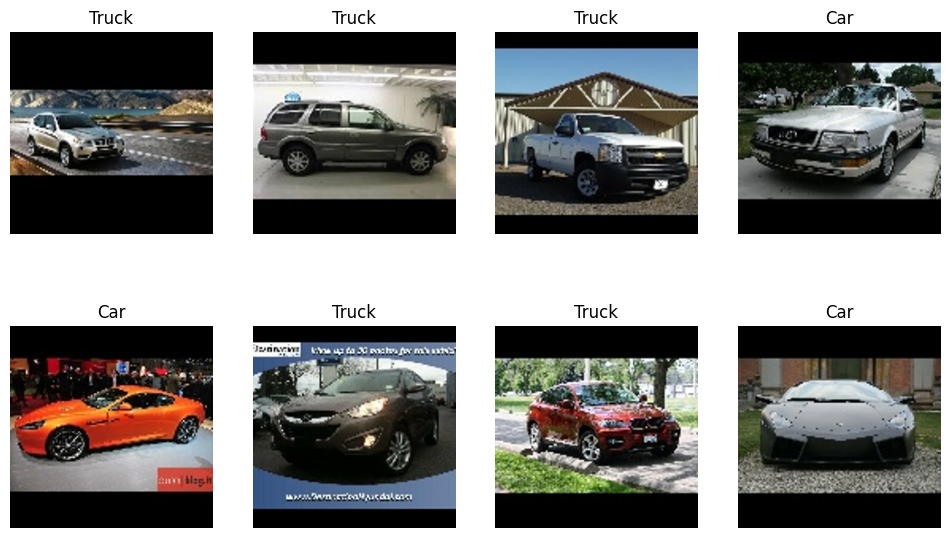

In [ ]:
plt.figure(figsize=(12, 7))

for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])
  plt.axis("off")
  plt.title(cates[y_train[ind]])

# 7. <a name="7">**Preprocessing**</a>

In [ ]:
def preprocess_data(X, y):

  X = np.array(X)

  X = X.astype(np.float32)

  X = X/255.0

  y = to_categorical(np.array(y))

  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)

In [ ]:
(X_val, y_val) = preprocess_data(X_val, y_val)

# 8. <a name="8">**Compile and Train model**</a>

In [ ]:
opt = Adam(learning_rate=0.1)

model.compile(loss= binary_crossentropy, optimizer=opt, metrics=['accuracy'])

In [ ]:
def train_model(model, epochs, batch_size):

  datagen = ImageDataGenerator(rescale = 1/255,
                              zoom_range=0.05,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              shear_range=0.05, 
                              fill_mode="nearest")


  train = datagen.flow_from_directory('/content/car-or-truck/train', batch_size=batch_size, target_size = (224, 224), class_mode = 'binary')

  val_gen = ImageDataGenerator(rescale = 1/255)
  val = val_gen.flow_from_directory('/content/car-or-truck/valid', batch_size=batch_size, target_size = (224, 224), class_mode = 'binary')


  path_cp = os.getcwd() + '/' + 'weights.hdf5'

  checkpoint = ModelCheckpoint(path_cp, monitor='val_accuracy', save_best_only=True, mode='auto')

  steps = train.n//train.batch_size

  history = model.fit(train, epochs= epochs, steps_per_epoch=steps, validation_data=val, verbose=1, callbacks=checkpoint)

  _, acc = model.evaluate(val, verbose=1)
  print()
  print('%.3f' % (acc*100.0))

  return history, acc

In [ ]:
tain_history, acc = train_model(model, 5, 128)

Found 5117 images belonging to 2 classes.
Found 5051 images belonging to 2 classes.
Epoch 1/5
39/39 [==============================] - 72s 2s/step - loss: 0.6888 - accuracy: 0.5785 - val_loss: 0.6848 - val_accuracy: 0.5785
Epoch 2/5
39/39 [==============================] - 68s 2s/step - loss: 0.6830 - accuracy: 0.5779 - val_loss: 0.6808 - val_accuracy: 0.5785
Epoch 3/5
39/39 [==============================] - 71s 2s/step - loss: 0.6812 - accuracy: 0.5787 - val_loss: 0.6808 - val_accuracy: 0.5785
Epoch 4/5
39/39 [==============================] - 71s 2s/step - loss: 0.6813 - accuracy: 0.5795 - val_loss: 0.6811 - val_accuracy: 0.5785
Epoch 5/5
40/40 [==============================] - 11s 278ms/step - loss: 0.6828 - accuracy: 0.5785

57.850


# 9. <a name="9">**Display accuracy and loss curves**</a>

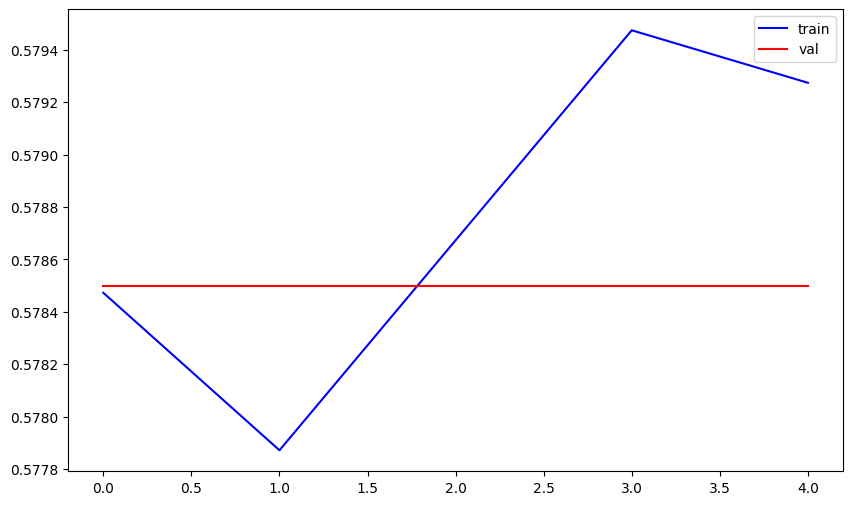

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='red', label='val')

  plt.legend()
  plt.show()

plot_accuracy(tain_history)